In [ ]:
#######################################################################################################################
# Project: Deep Virtual Rapport Agent (data analysis)
#
#     Jan Ondras (jo951030@gmail.com)
#     Institute for Creative Technologies, University of Southern California
#     April-October 2019
#
#######################################################################################################################
# Analysis and statistics of the sewa dataset
#######################################################################################################################

In [1]:
#######################################################################################################################
# Get histograms of head gesture durations
#######################################################################################################################

import glob
import pandas as pd
from collections import defaultdict

hgs = defaultdict(list)

for video_file in glob.glob('./../../datasets/sewa/*/*.avi'):
    
    hg_file = video_file[:-4] + '-HeadGesture.csv'    
    hg = pd.read_csv(hg_file)
    
    
    
    for _, row in hg.iterrows():
#         print(row['head_gesture'])
        
        d = row['last_frame'] - row['first_frame'] + 1
        
        if row['head_gesture'] == 'Nod':
            hgs['nod'].append(d)
            
        elif row['head_gesture'] == 'Shake':
            hgs['shake'].append(d)
        else:
            raise Exception('Unknown head gesture!')
    
    
#     break

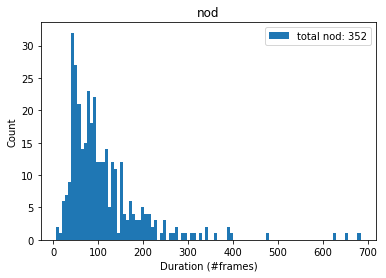

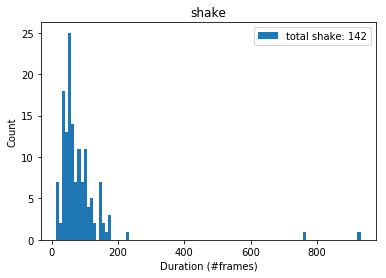

------------------------------------------------------------------------------------------------
Mean: 2.238409090909091	 Median: 1.8
Min: 0.14	 Max: 13.68


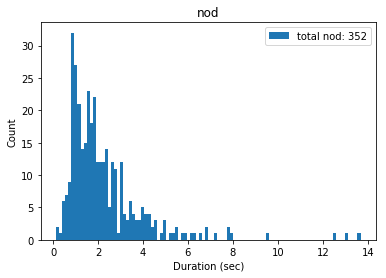

Mean: 1.7073239436619718	 Median: 1.27
Min: 0.28	 Max: 18.62


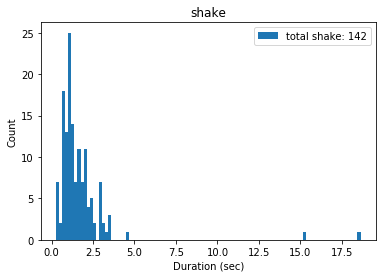

In [5]:
import matplotlib.pyplot as plt
import numpy as np

FPS = 50

bins_range = 100

for k in hgs.keys():
    plt.figure()
    plt.title(k)
    plt.hist(hgs[k], bins=bins_range, label=f'total {k}: {len(hgs[k])}')
    plt.xlabel('Duration (#frames)')
    plt.ylabel('Count')
    plt.legend()
    plt.show()
         
print("------------------------------------------------------------------------------------------------")
         
for k in hgs.keys():
    print(f'Mean: {np.mean(hgs[k]) / FPS}\t Median: {np.median(hgs[k]) / FPS}')
    print(f'Min: {np.min(hgs[k]) / FPS}\t Max: {np.max(hgs[k]) / FPS}')
    # Save all durations for overall stats
    np.savez(f'./gesture_durations/{k}_sewa', durations=np.array(hgs[k]) / FPS)
    
    plt.figure()
    plt.title(k)
    plt.hist(np.array(hgs[k]) / FPS, bins=bins_range, label=f'total {k}: {len(hgs[k])}')
    plt.xlabel('Duration (sec)')
    plt.ylabel('Count')
    plt.legend()
    plt.show()


In [4]:
for k in hgs.keys():
    print(f"total duration of {k}: {np.sum(hgs[k])} frames; {np.sum(hgs[k])/FPS} seconds")

total duration of nod: 39396 frames; 787.92 seconds
total duration of shake: 12122 frames; 242.44 seconds


In [9]:
#######################################################################################################################
# Check and get number of subjects (should be <= 398) in the sewa dataset
#######################################################################################################################

import glob
import pandas as pd
from collections import defaultdict

sids = set()

for csv_file in glob.glob('/home/ICT2000/jondras/datasets/sewa/listener_features/*.csv'):
    sid = int(csv_file.split('/')[-1].split('_')[3][1:])
    sids.add(sid)
    
print(f'{len(sids)} different subjects\n')
print(sids)


275 different subjects

{1, 2, 4, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 22, 23, 24, 25, 27, 28, 31, 33, 34, 35, 36, 38, 39, 41, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 60, 62, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 80, 81, 83, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 103, 104, 109, 114, 117, 118, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 189, 190, 191, 193, 194, 196, 198, 201, 202, 209, 210, 212, 214, 215, 216, 217, 219, 220, 221, 222, 224, 226, 227, 228, 229, 230, 232, 233, 234, 236, 237, 239, 244, 245, 251, 255, 256, 257, 258, 260, 261, 262, 263, 264, 266, 267, 269, 271, 272, 274, 275, 278, 279, 280, 282, 283, 285, 286, 287, 288, 289, 290, 291, 292, 293, 295, 301, 302, 305, 30